<a href="https://colab.research.google.com/github/hvmdvvn/Artificial-Neural-Networks/blob/main/Lab_01_SLP%2C_MLP%2C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1**

Implement a single-layer perceptron (SLP) to classify linearly separable data. Understand how
the perceptron algorithm works and visualize its decision boundary.

### Basic

In [25]:
import numpy as np
import random

In [26]:
X = np.array([
    [1, 2], [2, 3], [3, 3], [4, 5],   # Class 0
    [6, 5], [7, 8], [8, 7], [9, 9]    # Class 1
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Labels

In [27]:
# Initialize weights & bias randomly
w1 = random.random()
w2 = random.random()
b = random.random()
lr = 0.1

In [28]:
print("Initial weights and bias:", w1, w2, b)

Initial weights and bias: 0.27326520650609176 0.2717947737875702 0.6799145496665748


In [29]:
# Activation function (step)
def activation(x):
    return 1 if x > 0 else 0

In [30]:
# Perceptron update rule for one sample
def perceptron_update(x1, x2, y_true, w1, w2, b, lr):
    linear_output = w1 * x1 + w2 * x2 + b
    y_pred = activation(linear_output)

    # Update rule
    w1 = w1 + lr * (y_true - y_pred) * x1
    w2 = w2 + lr * (y_true - y_pred) * x2
    b  = b  + lr * (y_true - y_pred)

    return w1, w2, b

In [31]:
# Training loop
epochs = 10
for epoch in range(epochs):
    for i in range(len(X)):
        x1, x2 = X[i]
        w1, w2, b = perceptron_update(x1, x2, y[i], w1, w2, b, lr)
    print(f"After epoch {epoch+1}: w1={w1:.3f}, w2={w2:.3f}, b={b:.3f}")

After epoch 1: w1=0.573, w2=0.272, b=0.580
After epoch 2: w1=0.573, w2=-0.028, b=0.380
After epoch 3: w1=0.873, w2=-0.028, b=0.280
After epoch 4: w1=0.873, w2=-0.328, b=0.080
After epoch 5: w1=1.073, w2=-0.328, b=-0.020
After epoch 6: w1=1.473, w2=-0.028, b=-0.120
After epoch 7: w1=1.573, w2=-0.028, b=-0.320
After epoch 8: w1=1.673, w2=-0.028, b=-0.520
After epoch 9: w1=1.073, w2=-0.828, b=-0.820
After epoch 10: w1=1.073, w2=-0.828, b=-0.820


In [32]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(X, y, w1, w2, b):
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color="blue", marker="o")
        else:
            plt.scatter(X[i][0], X[i][1], color="red", marker="x")

    # Plot decision boundary: w1*x1 + w2*x2 + b = 0
    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(w1 * x_vals + b) / w2
    plt.plot(x_vals, y_vals, "g--")

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

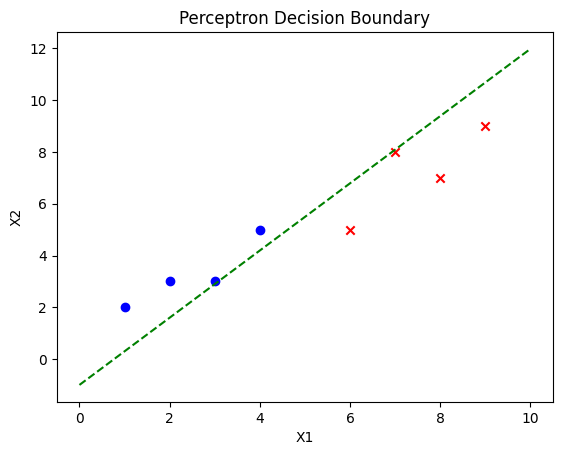

In [33]:
visualize(X, y, w1, w2, b)

### Using Classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([
    [1, 2], [2, 3], [3, 3], [4, 5],   # Class 0
    [6, 5], [7, 8], [8, 7], [9, 9]    # Class 1
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Labels

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def activation(self, x):
        return np.where(x > 0, 1, 0)  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.w) + self.b
                y_pred = self.activation(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.w += update * x_i
                self.b += update

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return self.activation(linear_output)

In [ ]:
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

print("Learned weights:", perceptron.w)
print("Learned bias:", perceptron.b)

Learned weights: [ 1.1 -0.8]
Learned bias: -0.8999999999999999


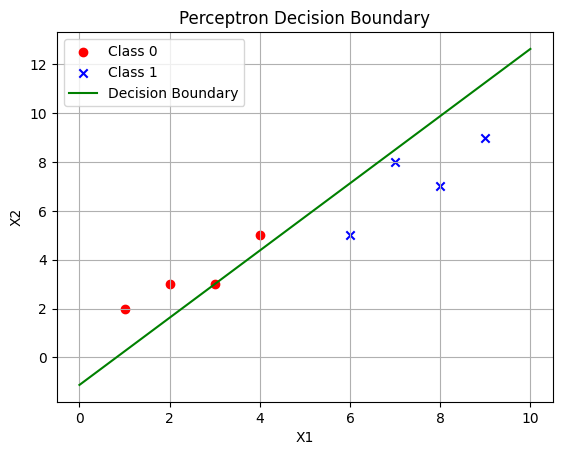

In [ ]:
for idx, point in enumerate(X):
    if y[idx] == 0:
        plt.scatter(point[0], point[1], color="red", marker="o", label="Class 0" if idx == 0 else "")
    else:
        plt.scatter(point[0], point[1], color="blue", marker="x", label="Class 1" if idx == 4 else "")

x1_vals = np.linspace(0, 10, 100)
if perceptron.w[1] != 0:
    x2_vals = -(perceptron.w[0] * x1_vals + perceptron.b) / perceptron.w[1]
    plt.plot(x1_vals, x2_vals, color="green", label="Decision Boundary")
else:
    plt.axvline(x=-perceptron.b / perceptron.w[0], color="green", label="Decision Boundary")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

### Using Pytorch

In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [35]:
X = np.array([
    [1, 2], [2, 3], [3, 3], [4, 5],   # Class 0
    [6, 5], [7, 8], [8, 7], [9, 9]    # Class 1
], dtype=np.float32)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1], dtype=np.float32)

In [36]:
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y).unsqueeze(1)  # shape (8,1)

In [37]:
model = nn.Sequential(
    nn.Linear(2, 1),   # input=2 features
    nn.Sigmoid()       # activation
)


In [38]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [39]:
for epoch in range(50):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.4238
Epoch 20, Loss: 0.3924
Epoch 30, Loss: 0.3658
Epoch 40, Loss: 0.3430
Epoch 50, Loss: 0.3234


In [40]:
w1, w2 = model[0].weight.detach().numpy()[0]
b = model[0].bias.detach().numpy()[0]

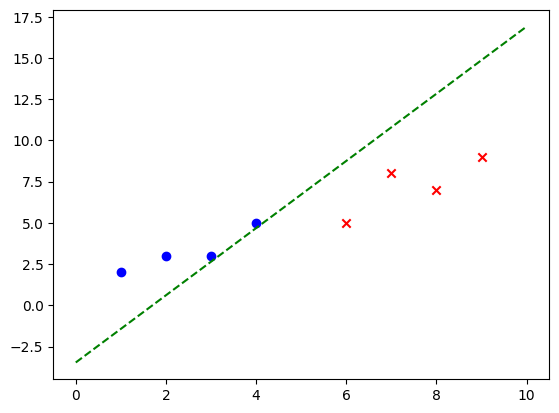

In [41]:
def visualize(X, y, w1, w2, b):
    for i in range(len(X)):
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color="blue", marker="o")
        else:
            plt.scatter(X[i][0], X[i][1], color="red", marker="x")
    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(w1 * x_vals + b) / w2
    plt.plot(x_vals, y_vals, "g--")
    plt.show()

visualize(X, y, w1, w2, b)

### Using Tensorflow/Keras

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [43]:
X = np.array([
    [1, 2], [2, 3], [3, 3], [4, 5],   # Class 0
    [6, 5], [7, 8], [8, 7], [9, 9]    # Class 1
], dtype=np.float32)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1], dtype=np.float32)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [49]:
model.fit(X, y, epochs=10, verbose=0)

In [50]:
weights, bias = model.layers[0].get_weights()
w1, w2 = weights[:,0]
b = bias[0]

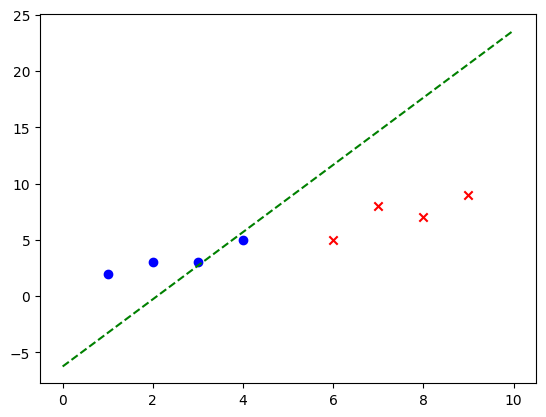

In [51]:
def visualize(X, y, w1, w2, b):
    for i in range(len(X)):
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color="blue", marker="o")
        else:
            plt.scatter(X[i][0], X[i][1], color="red", marker="x")
    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(w1 * x_vals + b) / w2
    plt.plot(x_vals, y_vals, "g--")
    plt.show()

visualize(X, y, w1, w2, b)

## **Task 2**

Understand the capability of a multilayer perceptron (MLP) to solve non-linearly
separable problems like XOR. Implement a simple MLP with one hidden layer.

### Basic


In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [96]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [119]:
w1 = np.random.randn(2,2)
b1 = np.zeros((1,2))
w2 = np.random.randn(2,1)
b2 = np.zeros((1,1))
lr = 0.1

In [109]:
def forward(X, w1, b1, w2, b2):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return a1, a2

In [108]:
def backward(X, y, a1, a2, w1, b1, w2, b2, lr):
    m = len(y)

    # Output layer error
    error_output = a2 - y
    dW2 = np.dot(a1.T, error_output * sigmoid_derivative(a2))
    db2 = np.sum(error_output * sigmoid_derivative(a2), axis=0, keepdims=True)

    # Hidden layer error
    error_hidden = np.dot(error_output * sigmoid_derivative(a2), w2.T)
    dW1 = np.dot(X.T, error_hidden * sigmoid_derivative(a1))
    db1 = np.sum(error_hidden * sigmoid_derivative(a1), axis=0, keepdims=True)

    # Update weights
    w1 -= lr * dW1
    b1 -= lr * db1
    w2 -= lr * dW2
    b2 -= lr * db2

    return w1, b1, w2, b2

In [106]:
def train(X, y, w1, b1, w2, b2, epochs=1000, lr=0.1):
    losses = []
    for epoch in range(epochs):
        a1, a2 = forward(X, w1, b1, w2, b2)
        loss = np.mean(0.5 * (y - a2)**2)
        losses.append(loss)
        w1, b1, w2, b2 = backward(X, y, a1, a2, w1, b1, w2, b2, lr)
        if (epoch+1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return w1, b1, w2, b2, losses

In [116]:
def predict(X, w1, b1, w2, b2):
    _, a2 = forward(X, w1, b1, w2, b2)
    return (a2 > 0.5).astype(int)

In [120]:
w1, b1, w2, b2, losses = train(X, y, w1, b1, w2, b2, epochs=30000, lr=0.1)

Epoch 100, Loss: 0.1251
Epoch 200, Loss: 0.1251
Epoch 300, Loss: 0.1250
Epoch 400, Loss: 0.1250
Epoch 500, Loss: 0.1250
Epoch 600, Loss: 0.1250
Epoch 700, Loss: 0.1250
Epoch 800, Loss: 0.1250
Epoch 900, Loss: 0.1250
Epoch 1000, Loss: 0.1250
Epoch 1100, Loss: 0.1250
Epoch 1200, Loss: 0.1250
Epoch 1300, Loss: 0.1250
Epoch 1400, Loss: 0.1250
Epoch 1500, Loss: 0.1250
Epoch 1600, Loss: 0.1250
Epoch 1700, Loss: 0.1250
Epoch 1800, Loss: 0.1250
Epoch 1900, Loss: 0.1250
Epoch 2000, Loss: 0.1250
Epoch 2100, Loss: 0.1250
Epoch 2200, Loss: 0.1250
Epoch 2300, Loss: 0.1250
Epoch 2400, Loss: 0.1250
Epoch 2500, Loss: 0.1250
Epoch 2600, Loss: 0.1250
Epoch 2700, Loss: 0.1250
Epoch 2800, Loss: 0.1250
Epoch 2900, Loss: 0.1250
Epoch 3000, Loss: 0.1250
Epoch 3100, Loss: 0.1250
Epoch 3200, Loss: 0.1250
Epoch 3300, Loss: 0.1250
Epoch 3400, Loss: 0.1250
Epoch 3500, Loss: 0.1250
Epoch 3600, Loss: 0.1250
Epoch 3700, Loss: 0.1250
Epoch 3800, Loss: 0.1250
Epoch 3900, Loss: 0.1250
Epoch 4000, Loss: 0.1250
Epoch 410

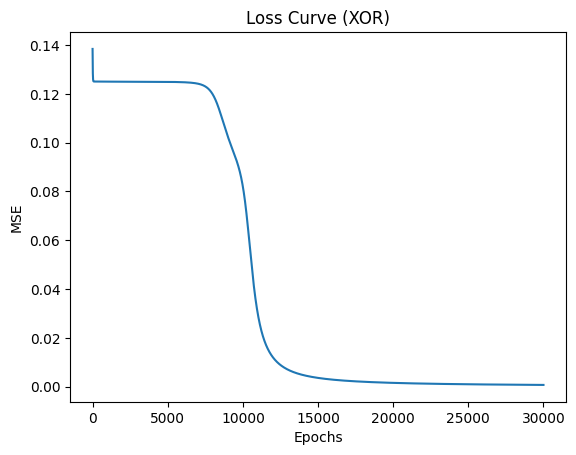

In [121]:
plt.plot(losses)
plt.title("Loss Curve (XOR)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [122]:
print("\nFinal Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> {predict(X[i].reshape(1,-1), w1, b1, w2, b2)[0][0]}")


Final Predictions:
Input: [0 0] -> 0
Input: [0 1] -> 1
Input: [1 0] -> 1
Input: [1 1] -> 0


### Using Classes

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [86]:
class MLP_XOR:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, lr=0.1):
        self.lr = lr

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        m = len(y)

        error_output = self.a2 - y
        dW2 = np.dot(self.a1.T, error_output * sigmoid_derivative(self.a2))
        db2 = np.sum(error_output * sigmoid_derivative(self.a2), axis=0, keepdims=True)

        error_hidden = np.dot(error_output * sigmoid_derivative(self.a2), self.W2.T)
        dW1 = np.dot(X.T, error_hidden * sigmoid_derivative(self.a1))
        db1 = np.sum(error_hidden * sigmoid_derivative(self.a1), axis=0, keepdims=True)

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = np.mean(0.5 * (y - y_pred)**2)  # MSE
            losses.append(loss)
            self.backward(X, y)

            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

In [91]:
mlp = MLP_XOR(lr=0.1)
losses = mlp.train(X, y, epochs=30000)

Epoch 100, Loss: 0.1254
Epoch 200, Loss: 0.1253
Epoch 300, Loss: 0.1253
Epoch 400, Loss: 0.1252
Epoch 500, Loss: 0.1252
Epoch 600, Loss: 0.1252
Epoch 700, Loss: 0.1251
Epoch 800, Loss: 0.1251
Epoch 900, Loss: 0.1251
Epoch 1000, Loss: 0.1251
Epoch 1100, Loss: 0.1251
Epoch 1200, Loss: 0.1251
Epoch 1300, Loss: 0.1251
Epoch 1400, Loss: 0.1251
Epoch 1500, Loss: 0.1251
Epoch 1600, Loss: 0.1251
Epoch 1700, Loss: 0.1251
Epoch 1800, Loss: 0.1250
Epoch 1900, Loss: 0.1250
Epoch 2000, Loss: 0.1250
Epoch 2100, Loss: 0.1250
Epoch 2200, Loss: 0.1250
Epoch 2300, Loss: 0.1250
Epoch 2400, Loss: 0.1250
Epoch 2500, Loss: 0.1250
Epoch 2600, Loss: 0.1250
Epoch 2700, Loss: 0.1250
Epoch 2800, Loss: 0.1250
Epoch 2900, Loss: 0.1250
Epoch 3000, Loss: 0.1250
Epoch 3100, Loss: 0.1250
Epoch 3200, Loss: 0.1250
Epoch 3300, Loss: 0.1250
Epoch 3400, Loss: 0.1250
Epoch 3500, Loss: 0.1250
Epoch 3600, Loss: 0.1250
Epoch 3700, Loss: 0.1250
Epoch 3800, Loss: 0.1250
Epoch 3900, Loss: 0.1250
Epoch 4000, Loss: 0.1250
Epoch 410

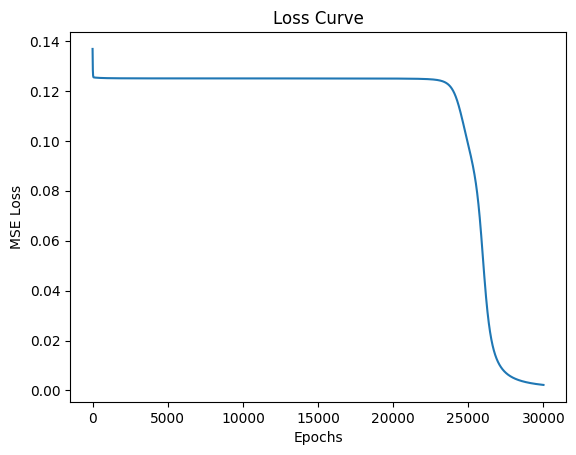

In [92]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

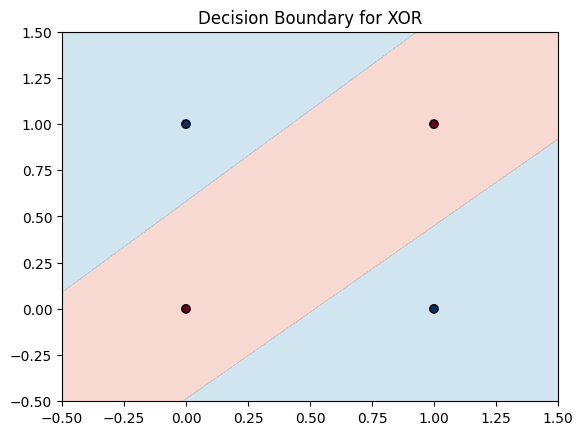

In [93]:
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = mlp.forward(grid).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=[0,0.5,1], alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="RdBu", edgecolors="k")
plt.title("Decision Boundary for XOR")
plt.show()

In [94]:
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {mlp.predict(X[i].reshape(1,-1))[0][0]}")

Predictions:
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 1
Input: [1 0] -> Predicted: 1
Input: [1 1] -> Predicted: 0


## **Task 3**

Train a feedforward neural network (FNN) to classify handwritten digits from the MNIST
dataset.

### Basic


In [128]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [129]:
class MNISTDataset:
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # Flatten (28x28 -> 784), normalize
        self.x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
        self.x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

        # One-hot encoding for labels
        self.y_train = np.eye(10)[y_train]
        self.y_test = np.eye(10)[y_test]

In [ ]:
w1 = np.random.randn(784, 128)
b1 = np.zeros((1, 128))

w2 = np.random.randn(128,

### Using Class


In [123]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [124]:
class MNISTDataset:
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # Flatten (28x28 -> 784), normalize
        self.x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
        self.x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

        # One-hot encoding for labels
        self.y_train = np.eye(10)[y_train]
        self.y_test = np.eye(10)[y_test]

In [125]:
class FeedforwardNN:
    def __init__(self, input_dim=784, hidden_dim=128, output_dim=10, lr=0.001):
        self.lr = lr
        # Xavier initialization
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, hidden_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros((1, hidden_dim))
        self.W3 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b3 = np.zeros((1, output_dim))

    # Activation functions
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # Forward pass
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.softmax(self.z3)

        return self.a3

    # Backward pass (cross-entropy loss)
    def backward(self, X, y, output):
        m = y.shape[0]

        dz3 = output - y
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = np.dot(dz3, self.W3.T) * self.relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Gradient descent update
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    # Loss (categorical crossentropy)
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

In [130]:
class Trainer:
    def __init__(self, model, dataset):
        self.model = model
        self.dataset = dataset

    def train(self, epochs=100, batch_size=32):
        losses = []
        for epoch in range(epochs):
            # Mini-batch SGD
            idx = np.random.permutation(len(self.dataset.x_train))
            X_shuffled = self.dataset.x_train[idx]
            y_shuffled = self.dataset.y_train[idx]

            for i in range(0, len(X_shuffled), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.model.forward(X_batch)
                self.model.backward(X_batch, y_batch, outputs)

            # Track loss
            outputs = self.model.forward(self.dataset.x_train[:1000])  # small subset
            loss = self.model.compute_loss(self.dataset.y_train[:1000], outputs)
            losses.append(loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

        # Plot loss
        plt.plot(losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss Curve")
        plt.show()

    def evaluate(self):
        preds = self.model.predict(self.dataset.x_test)
        true = np.argmax(self.dataset.y_test, axis=1)
        acc = np.mean(preds == true)
        print(f"Test Accuracy: {acc*100:.2f}%")
        return acc

    def visualize_predictions(self, n=5):
        preds = self.model.predict(self.dataset.x_test[:n])
        true = np.argmax(self.dataset.y_test[:n], axis=1)

        plt.figure(figsize=(10, 3))
        for i in range(n):
            plt.subplot(1, n, i+1)
            plt.imshow(self.dataset.x_test[i].reshape(28, 28), cmap="gray")
            plt.title(f"P:{preds[i]} / T:{true[i]}")
            plt.axis("off")
        plt.show()

Epoch 1/100, Loss: 1.7338
Epoch 2/100, Loss: 1.0237
Epoch 3/100, Loss: 0.7088
Epoch 4/100, Loss: 0.5730
Epoch 5/100, Loss: 0.4989
Epoch 6/100, Loss: 0.4528
Epoch 7/100, Loss: 0.4207
Epoch 8/100, Loss: 0.3975
Epoch 9/100, Loss: 0.3812
Epoch 10/100, Loss: 0.3640
Epoch 11/100, Loss: 0.3522
Epoch 12/100, Loss: 0.3436
Epoch 13/100, Loss: 0.3306
Epoch 14/100, Loss: 0.3236
Epoch 15/100, Loss: 0.3154
Epoch 16/100, Loss: 0.3081
Epoch 17/100, Loss: 0.3011
Epoch 18/100, Loss: 0.2954
Epoch 19/100, Loss: 0.2896
Epoch 20/100, Loss: 0.2841
Epoch 21/100, Loss: 0.2806
Epoch 22/100, Loss: 0.2749
Epoch 23/100, Loss: 0.2698
Epoch 24/100, Loss: 0.2651
Epoch 25/100, Loss: 0.2631
Epoch 26/100, Loss: 0.2556
Epoch 27/100, Loss: 0.2529
Epoch 28/100, Loss: 0.2488
Epoch 29/100, Loss: 0.2443
Epoch 30/100, Loss: 0.2441
Epoch 31/100, Loss: 0.2372
Epoch 32/100, Loss: 0.2355
Epoch 33/100, Loss: 0.2312
Epoch 34/100, Loss: 0.2285
Epoch 35/100, Loss: 0.2245
Epoch 36/100, Loss: 0.2233
Epoch 37/100, Loss: 0.2187
Epoch 38/1

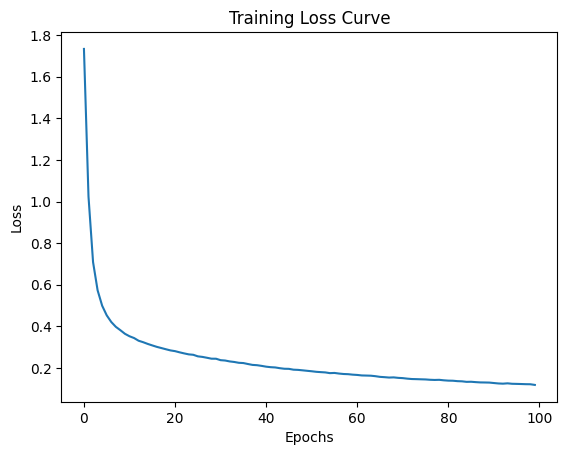

Test Accuracy: 96.39%


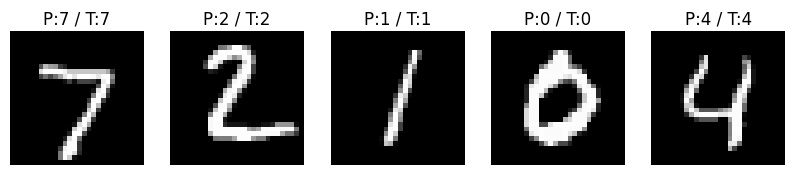

In [132]:
dataset = MNISTDataset()
model = FeedforwardNN()
trainer = Trainer(model, dataset)

trainer.train(epochs=100, batch_size=32)
trainer.evaluate()
trainer.visualize_predictions(n=5)